# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент гр. 0303 Калмак Даниил, вариант 9 нечетный.

## Цель работы
Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения
**Группа** - множество G с бинарной операцией * называется группой, если:  
1) операция * ассоциативна  
2) в G существует нейтральный элемент $e$  
3) $\forall a \in G \; \exists$ обратный элемент $a' \in G$, такой что $a'*a = a*a' = e$.

Пусть $G$ - группа с нейтральным элементом $e$, а $X$ - множество. Будем говорить, что $G$ действует на $X$, если задана операция: $G\times X \rightarrow X$, обладающая для любого $x\in X$ и $g, h \in G$ следующими свойствами:  
1) $ex = x $  
2) $gh(x) = g(h(x))$

**Орбита** - орбитой элемента $x \in X$ под действием $G$ называется множество $Gx = \{ gx : g \in G \}$. Число $\#(G_x)$ называется длиной орбиты.

Неподвижными точками элемента $g \in G$ называют точки $x \in G$, для которых $gx = x$. Множество неподвижных точек элемента $g$ обозначают $X^g$.

### Лемма Бёрнсайда
Количество орбит N действия группы $G$ на множестве $X$ равно: <center> $N = \cfrac{1}{\#G}\sum_{g \in G} \#X^{g}$ </center>

### Задача о раскрасках
Пусть $I$ - произвольное множество, а $C$ - множество цветов. Расскраской $i$ называется функция из $I$ в $C$. Множество всех раскрасок обозначается $C^I$. Количество всех раскрасок равно $\#C^{\#I}$.

Пусть $g \in G, f \in C^I$. Тогда для этих $g$ и $f$ следующие условия эквивалентны:  
1) $gf = f$  
2) $f(i) = f(g^ni) \; \forall \; i \in I, \forall \; n \in Z$.  
3) Если $i, j \in I$ лежат в одном цикле в циклической записи перестановки $\alpha(g)$, то $f(i) = f(g)$.

Количество раскрасок из множетсва $C^I$, которые сохраняют элемент $g \in G$ равно $\#C^{c(\phi(g))}$, $c(\phi(g))$ - число независимых циклов в записи перестановки $\phi(g)$

## Постановка задачи
Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath.
Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно
проинтерпретировать.
2. Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.
3. Для заданного варианта решить задачу в общем виде.

## Задача
Сколькими способами можно составить бусы из 74 бусинок 4 различных цветов (с точностью до поворотов и осевых симметрий)?

## Выполнение работы

### 1. Аналитически решим задачу о раскрасках для заданного варианта.

X - множество расцветок бус. Вид: $\{x_1, x_2, ..., x_{74}\}$, где цвета $x_i \in \{a, b, c, d\}$ - 4 цвета. Получается, всего комбинаций $4^{74}$, каждая бусина может быть каким-то из четырех цветов. Однако комбинации повторяются из-за поворотов и осевых симметрий.

G - группа поворотов и осевых симметрий на множестве X.

Пусть:

$e$ - нейтральное преобразование

$\sigma$ - поворот против часовой стрелки

$\tau$ - поворот вокруг оси (осевая симметрия)

Нейтральное преобразование в виде перестановки:

$e = (1)(2)(3)(4)(5)(6)(7)(8)(9)(10)(11)(12)(13)(14)(15)(16)(17)(18)(19)(20)(21)(22)(23)(24)(25)(26)(27)(28)(29)(30)(31)(32)(33)(34)(35)(36)(37)(38)(39)(40)(41)(42)(43)(44)(45)(46)(47)(48)(49)(50)(51)(52)(53)(54)(55)(56)(57)(58)(59)(60)(61)(62)(63)(64)(65)(66)(67)(68)(69)(70)(71)(72)(73)(74)$

Повороты в виде перестановок $\sigma^i$ - 73 перестановки:

In [1]:
SG74 = SymmetricGroup(74)
sigma = SG74("(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74)")
pretty_print(LatexExpr("𝜎 ="), sigma, " len=1")
sigma_i = sigma
for i in range(1, 73):
    sigma_i = sigma * sigma_i
    pretty_print(LatexExpr("𝜎^{" +str(i + 1)+"} ="), sigma_i, " len=", len(sigma_i.cycle_tuples(singletons=True)))

𝜎 = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) ' len=1'

𝜎^{2} = (1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73)(2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74) ' len=' 2

𝜎^{3} = (1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72) ' len=' 1

𝜎^{4} = (1,5,9,13,17,21,25,29,33,37,41,45,49,53,57,61,65,69,73,3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71)(2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72) ' len=' 2

𝜎^{5} = (1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,5,10,15,20,25,30,35,40,45,50,55,60,65,70) ' len=' 1

𝜎^{6} = (1,7,13,19,25,31,37,43,49,55,61,67,73,5,11,17,23,29,35,41,47,53,59,65,71,3,9,15,21,27,33,39,45,51,57,63,69)(2,8,14,20,26,32,38,44,50,56,62,68,74,6,12,18,24,30,36,42,48,54,60,66,72,4,10,16,22,28,34,40,46,52,58,64,70) ' len=' 2

𝜎^{7} = (1,8,15,22,29,36,43,50,57,64,71,4,11,18,25,32,39,46,53,60,67,74,7,14,21,28,35,42,49,56,63,70,3,10,17,24,31,38,45,52,59,66,73,6,13,20,27,34,41,48,55,62,69,2,9,16,23,30,37,44,51,58,65,72,5,12,19,26,33,40,47,54,61,68) ' len=' 1

𝜎^{8} = (1,9,17,25,33,41,49,57,65,73,7,15,23,31,39,47,55,63,71,5,13,21,29,37,45,53,61,69,3,11,19,27,35,43,51,59,67)(2,10,18,26,34,42,50,58,66,74,8,16,24,32,40,48,56,64,72,6,14,22,30,38,46,54,62,70,4,12,20,28,36,44,52,60,68) ' len=' 2

𝜎^{9} = (1,10,19,28,37,46,55,64,73,8,17,26,35,44,53,62,71,6,15,24,33,42,51,60,69,4,13,22,31,40,49,58,67,2,11,20,29,38,47,56,65,74,9,18,27,36,45,54,63,72,7,16,25,34,43,52,61,70,5,14,23,32,41,50,59,68,3,12,21,30,39,48,57,66) ' len=' 1

𝜎^{10} = (1,11,21,31,41,51,61,71,7,17,27,37,47,57,67,3,13,23,33,43,53,63,73,9,19,29,39,49,59,69,5,15,25,35,45,55,65)(2,12,22,32,42,52,62,72,8,18,28,38,48,58,68,4,14,24,34,44,54,64,74,10,20,30,40,50,60,70,6,16,26,36,46,56,66) ' len=' 2

𝜎^{11} = (1,12,23,34,45,56,67,4,15,26,37,48,59,70,7,18,29,40,51,62,73,10,21,32,43,54,65,2,13,24,35,46,57,68,5,16,27,38,49,60,71,8,19,30,41,52,63,74,11,22,33,44,55,66,3,14,25,36,47,58,69,6,17,28,39,50,61,72,9,20,31,42,53,64) ' len=' 1

𝜎^{12} = (1,13,25,37,49,61,73,11,23,35,47,59,71,9,21,33,45,57,69,7,19,31,43,55,67,5,17,29,41,53,65,3,15,27,39,51,63)(2,14,26,38,50,62,74,12,24,36,48,60,72,10,22,34,46,58,70,8,20,32,44,56,68,6,18,30,42,54,66,4,16,28,40,52,64) ' len=' 2

𝜎^{13} = (1,14,27,40,53,66,5,18,31,44,57,70,9,22,35,48,61,74,13,26,39,52,65,4,17,30,43,56,69,8,21,34,47,60,73,12,25,38,51,64,3,16,29,42,55,68,7,20,33,46,59,72,11,24,37,50,63,2,15,28,41,54,67,6,19,32,45,58,71,10,23,36,49,62) ' len=' 1

𝜎^{14} = (1,15,29,43,57,71,11,25,39,53,67,7,21,35,49,63,3,17,31,45,59,73,13,27,41,55,69,9,23,37,51,65,5,19,33,47,61)(2,16,30,44,58,72,12,26,40,54,68,8,22,36,50,64,4,18,32,46,60,74,14,28,42,56,70,10,24,38,52,66,6,20,34,48,62) ' len=' 2

𝜎^{15} = (1,16,31,46,61,2,17,32,47,62,3,18,33,48,63,4,19,34,49,64,5,20,35,50,65,6,21,36,51,66,7,22,37,52,67,8,23,38,53,68,9,24,39,54,69,10,25,40,55,70,11,26,41,56,71,12,27,42,57,72,13,28,43,58,73,14,29,44,59,74,15,30,45,60) ' len=' 1

𝜎^{16} = (1,17,33,49,65,7,23,39,55,71,13,29,45,61,3,19,35,51,67,9,25,41,57,73,15,31,47,63,5,21,37,53,69,11,27,43,59)(2,18,34,50,66,8,24,40,56,72,14,30,46,62,4,20,36,52,68,10,26,42,58,74,16,32,48,64,6,22,38,54,70,12,28,44,60) ' len=' 2

𝜎^{17} = (1,18,35,52,69,12,29,46,63,6,23,40,57,74,17,34,51,68,11,28,45,62,5,22,39,56,73,16,33,50,67,10,27,44,61,4,21,38,55,72,15,32,49,66,9,26,43,60,3,20,37,54,71,14,31,48,65,8,25,42,59,2,19,36,53,70,13,30,47,64,7,24,41,58) ' len=' 1

𝜎^{18} = (1,19,37,55,73,17,35,53,71,15,33,51,69,13,31,49,67,11,29,47,65,9,27,45,63,7,25,43,61,5,23,41,59,3,21,39,57)(2,20,38,56,74,18,36,54,72,16,34,52,70,14,32,50,68,12,30,48,66,10,28,46,64,8,26,44,62,6,24,42,60,4,22,40,58) ' len=' 2

𝜎^{19} = (1,20,39,58,3,22,41,60,5,24,43,62,7,26,45,64,9,28,47,66,11,30,49,68,13,32,51,70,15,34,53,72,17,36,55,74,19,38,57,2,21,40,59,4,23,42,61,6,25,44,63,8,27,46,65,10,29,48,67,12,31,50,69,14,33,52,71,16,35,54,73,18,37,56) ' len=' 1

𝜎^{20} = (1,21,41,61,7,27,47,67,13,33,53,73,19,39,59,5,25,45,65,11,31,51,71,17,37,57,3,23,43,63,9,29,49,69,15,35,55)(2,22,42,62,8,28,48,68,14,34,54,74,20,40,60,6,26,46,66,12,32,52,72,18,38,58,4,24,44,64,10,30,50,70,16,36,56) ' len=' 2

𝜎^{21} = (1,22,43,64,11,32,53,74,21,42,63,10,31,52,73,20,41,62,9,30,51,72,19,40,61,8,29,50,71,18,39,60,7,28,49,70,17,38,59,6,27,48,69,16,37,58,5,26,47,68,15,36,57,4,25,46,67,14,35,56,3,24,45,66,13,34,55,2,23,44,65,12,33,54) ' len=' 1

𝜎^{22} = (1,23,45,67,15,37,59,7,29,51,73,21,43,65,13,35,57,5,27,49,71,19,41,63,11,33,55,3,25,47,69,17,39,61,9,31,53)(2,24,46,68,16,38,60,8,30,52,74,22,44,66,14,36,58,6,28,50,72,20,42,64,12,34,56,4,26,48,70,18,40,62,10,32,54) ' len=' 2

𝜎^{23} = (1,24,47,70,19,42,65,14,37,60,9,32,55,4,27,50,73,22,45,68,17,40,63,12,35,58,7,30,53,2,25,48,71,20,43,66,15,38,61,10,33,56,5,28,51,74,23,46,69,18,41,64,13,36,59,8,31,54,3,26,49,72,21,44,67,16,39,62,11,34,57,6,29,52) ' len=' 1

𝜎^{24} = (1,25,49,73,23,47,71,21,45,69,19,43,67,17,41,65,15,39,63,13,37,61,11,35,59,9,33,57,7,31,55,5,29,53,3,27,51)(2,26,50,74,24,48,72,22,46,70,20,44,68,18,42,66,16,40,64,14,38,62,12,36,60,10,34,58,8,32,56,6,30,54,4,28,52) ' len=' 2

𝜎^{25} = (1,26,51,2,27,52,3,28,53,4,29,54,5,30,55,6,31,56,7,32,57,8,33,58,9,34,59,10,35,60,11,36,61,12,37,62,13,38,63,14,39,64,15,40,65,16,41,66,17,42,67,18,43,68,19,44,69,20,45,70,21,46,71,22,47,72,23,48,73,24,49,74,25,50) ' len=' 1

𝜎^{26} = (1,27,53,5,31,57,9,35,61,13,39,65,17,43,69,21,47,73,25,51,3,29,55,7,33,59,11,37,63,15,41,67,19,45,71,23,49)(2,28,54,6,32,58,10,36,62,14,40,66,18,44,70,22,48,74,26,52,4,30,56,8,34,60,12,38,64,16,42,68,20,46,72,24,50) ' len=' 2

𝜎^{27} = (1,28,55,8,35,62,15,42,69,22,49,2,29,56,9,36,63,16,43,70,23,50,3,30,57,10,37,64,17,44,71,24,51,4,31,58,11,38,65,18,45,72,25,52,5,32,59,12,39,66,19,46,73,26,53,6,33,60,13,40,67,20,47,74,27,54,7,34,61,14,41,68,21,48) ' len=' 1

𝜎^{28} = (1,29,57,11,39,67,21,49,3,31,59,13,41,69,23,51,5,33,61,15,43,71,25,53,7,35,63,17,45,73,27,55,9,37,65,19,47)(2,30,58,12,40,68,22,50,4,32,60,14,42,70,24,52,6,34,62,16,44,72,26,54,8,36,64,18,46,74,28,56,10,38,66,20,48) ' len=' 2

𝜎^{29} = (1,30,59,14,43,72,27,56,11,40,69,24,53,8,37,66,21,50,5,34,63,18,47,2,31,60,15,44,73,28,57,12,41,70,25,54,9,38,67,22,51,6,35,64,19,48,3,32,61,16,45,74,29,58,13,42,71,26,55,10,39,68,23,52,7,36,65,20,49,4,33,62,17,46) ' len=' 1

𝜎^{30} = (1,31,61,17,47,3,33,63,19,49,5,35,65,21,51,7,37,67,23,53,9,39,69,25,55,11,41,71,27,57,13,43,73,29,59,15,45)(2,32,62,18,48,4,34,64,20,50,6,36,66,22,52,8,38,68,24,54,10,40,70,26,56,12,42,72,28,58,14,44,74,30,60,16,46) ' len=' 2

𝜎^{31} = (1,32,63,20,51,8,39,70,27,58,15,46,3,34,65,22,53,10,41,72,29,60,17,48,5,36,67,24,55,12,43,74,31,62,19,50,7,38,69,26,57,14,45,2,33,64,21,52,9,40,71,28,59,16,47,4,35,66,23,54,11,42,73,30,61,18,49,6,37,68,25,56,13,44) ' len=' 1

𝜎^{32} = (1,33,65,23,55,13,45,3,35,67,25,57,15,47,5,37,69,27,59,17,49,7,39,71,29,61,19,51,9,41,73,31,63,21,53,11,43)(2,34,66,24,56,14,46,4,36,68,26,58,16,48,6,38,70,28,60,18,50,8,40,72,30,62,20,52,10,42,74,32,64,22,54,12,44) ' len=' 2

𝜎^{33} = (1,34,67,26,59,18,51,10,43,2,35,68,27,60,19,52,11,44,3,36,69,28,61,20,53,12,45,4,37,70,29,62,21,54,13,46,5,38,71,30,63,22,55,14,47,6,39,72,31,64,23,56,15,48,7,40,73,32,65,24,57,16,49,8,41,74,33,66,25,58,17,50,9,42) ' len=' 1

𝜎^{34} = (1,35,69,29,63,23,57,17,51,11,45,5,39,73,33,67,27,61,21,55,15,49,9,43,3,37,71,31,65,25,59,19,53,13,47,7,41)(2,36,70,30,64,24,58,18,52,12,46,6,40,74,34,68,28,62,22,56,16,50,10,44,4,38,72,32,66,26,60,20,54,14,48,8,42) ' len=' 2

𝜎^{35} = (1,36,71,32,67,28,63,24,59,20,55,16,51,12,47,8,43,4,39,74,35,70,31,66,27,62,23,58,19,54,15,50,11,46,7,42,3,38,73,34,69,30,65,26,61,22,57,18,53,14,49,10,45,6,41,2,37,72,33,68,29,64,25,60,21,56,17,52,13,48,9,44,5,40) ' len=' 1

𝜎^{36} = (1,37,73,35,71,33,69,31,67,29,65,27,63,25,61,23,59,21,57,19,55,17,53,15,51,13,49,11,47,9,45,7,43,5,41,3,39)(2,38,74,36,72,34,70,32,68,30,66,28,64,26,62,24,60,22,58,20,56,18,54,16,52,14,50,12,48,10,46,8,44,6,42,4,40) ' len=' 2

𝜎^{37} = (1,38)(2,39)(3,40)(4,41)(5,42)(6,43)(7,44)(8,45)(9,46)(10,47)(11,48)(12,49)(13,50)(14,51)(15,52)(16,53)(17,54)(18,55)(19,56)(20,57)(21,58)(22,59)(23,60)(24,61)(25,62)(26,63)(27,64)(28,65)(29,66)(30,67)(31,68)(32,69)(33,70)(34,71)(35,72)(36,73)(37,74) ' len=' 37

𝜎^{38} = (1,39,3,41,5,43,7,45,9,47,11,49,13,51,15,53,17,55,19,57,21,59,23,61,25,63,27,65,29,67,31,69,33,71,35,73,37)(2,40,4,42,6,44,8,46,10,48,12,50,14,52,16,54,18,56,20,58,22,60,24,62,26,64,28,66,30,68,32,70,34,72,36,74,38) ' len=' 2

𝜎^{39} = (1,40,5,44,9,48,13,52,17,56,21,60,25,64,29,68,33,72,37,2,41,6,45,10,49,14,53,18,57,22,61,26,65,30,69,34,73,38,3,42,7,46,11,50,15,54,19,58,23,62,27,66,31,70,35,74,39,4,43,8,47,12,51,16,55,20,59,24,63,28,67,32,71,36) ' len=' 1

𝜎^{40} = (1,41,7,47,13,53,19,59,25,65,31,71,37,3,43,9,49,15,55,21,61,27,67,33,73,39,5,45,11,51,17,57,23,63,29,69,35)(2,42,8,48,14,54,20,60,26,66,32,72,38,4,44,10,50,16,56,22,62,28,68,34,74,40,6,46,12,52,18,58,24,64,30,70,36) ' len=' 2

𝜎^{41} = (1,42,9,50,17,58,25,66,33,74,41,8,49,16,57,24,65,32,73,40,7,48,15,56,23,64,31,72,39,6,47,14,55,22,63,30,71,38,5,46,13,54,21,62,29,70,37,4,45,12,53,20,61,28,69,36,3,44,11,52,19,60,27,68,35,2,43,10,51,18,59,26,67,34) ' len=' 1

𝜎^{42} = (1,43,11,53,21,63,31,73,41,9,51,19,61,29,71,39,7,49,17,59,27,69,37,5,47,15,57,25,67,35,3,45,13,55,23,65,33)(2,44,12,54,22,64,32,74,42,10,52,20,62,30,72,40,8,50,18,60,28,70,38,6,48,16,58,26,68,36,4,46,14,56,24,66,34) ' len=' 2

𝜎^{43} = (1,44,13,56,25,68,37,6,49,18,61,30,73,42,11,54,23,66,35,4,47,16,59,28,71,40,9,52,21,64,33,2,45,14,57,26,69,38,7,50,19,62,31,74,43,12,55,24,67,36,5,48,17,60,29,72,41,10,53,22,65,34,3,46,15,58,27,70,39,8,51,20,63,32) ' len=' 1

𝜎^{44} = (1,45,15,59,29,73,43,13,57,27,71,41,11,55,25,69,39,9,53,23,67,37,7,51,21,65,35,5,49,19,63,33,3,47,17,61,31)(2,46,16,60,30,74,44,14,58,28,72,42,12,56,26,70,40,10,54,24,68,38,8,52,22,66,36,6,50,20,64,34,4,48,18,62,32) ' len=' 2

𝜎^{45} = (1,46,17,62,33,4,49,20,65,36,7,52,23,68,39,10,55,26,71,42,13,58,29,74,45,16,61,32,3,48,19,64,35,6,51,22,67,38,9,54,25,70,41,12,57,28,73,44,15,60,31,2,47,18,63,34,5,50,21,66,37,8,53,24,69,40,11,56,27,72,43,14,59,30) ' len=' 1

𝜎^{46} = (1,47,19,65,37,9,55,27,73,45,17,63,35,7,53,25,71,43,15,61,33,5,51,23,69,41,13,59,31,3,49,21,67,39,11,57,29)(2,48,20,66,38,10,56,28,74,46,18,64,36,8,54,26,72,44,16,62,34,6,52,24,70,42,14,60,32,4,50,22,68,40,12,58,30) ' len=' 2

𝜎^{47} = (1,48,21,68,41,14,61,34,7,54,27,74,47,20,67,40,13,60,33,6,53,26,73,46,19,66,39,12,59,32,5,52,25,72,45,18,65,38,11,58,31,4,51,24,71,44,17,64,37,10,57,30,3,50,23,70,43,16,63,36,9,56,29,2,49,22,69,42,15,62,35,8,55,28) ' len=' 1

𝜎^{48} = (1,49,23,71,45,19,67,41,15,63,37,11,59,33,7,55,29,3,51,25,73,47,21,69,43,17,65,39,13,61,35,9,57,31,5,53,27)(2,50,24,72,46,20,68,42,16,64,38,12,60,34,8,56,30,4,52,26,74,48,22,70,44,18,66,40,14,62,36,10,58,32,6,54,28) ' len=' 2

𝜎^{49} = (1,50,25,74,49,24,73,48,23,72,47,22,71,46,21,70,45,20,69,44,19,68,43,18,67,42,17,66,41,16,65,40,15,64,39,14,63,38,13,62,37,12,61,36,11,60,35,10,59,34,9,58,33,8,57,32,7,56,31,6,55,30,5,54,29,4,53,28,3,52,27,2,51,26) ' len=' 1

𝜎^{50} = (1,51,27,3,53,29,5,55,31,7,57,33,9,59,35,11,61,37,13,63,39,15,65,41,17,67,43,19,69,45,21,71,47,23,73,49,25)(2,52,28,4,54,30,6,56,32,8,58,34,10,60,36,12,62,38,14,64,40,16,66,42,18,68,44,20,70,46,22,72,48,24,74,50,26) ' len=' 2

𝜎^{51} = (1,52,29,6,57,34,11,62,39,16,67,44,21,72,49,26,3,54,31,8,59,36,13,64,41,18,69,46,23,74,51,28,5,56,33,10,61,38,15,66,43,20,71,48,25,2,53,30,7,58,35,12,63,40,17,68,45,22,73,50,27,4,55,32,9,60,37,14,65,42,19,70,47,24) ' len=' 1

𝜎^{52} = (1,53,31,9,61,39,17,69,47,25,3,55,33,11,63,41,19,71,49,27,5,57,35,13,65,43,21,73,51,29,7,59,37,15,67,45,23)(2,54,32,10,62,40,18,70,48,26,4,56,34,12,64,42,20,72,50,28,6,58,36,14,66,44,22,74,52,30,8,60,38,16,68,46,24) ' len=' 2

𝜎^{53} = (1,54,33,12,65,44,23,2,55,34,13,66,45,24,3,56,35,14,67,46,25,4,57,36,15,68,47,26,5,58,37,16,69,48,27,6,59,38,17,70,49,28,7,60,39,18,71,50,29,8,61,40,19,72,51,30,9,62,41,20,73,52,31,10,63,42,21,74,53,32,11,64,43,22) ' len=' 1

𝜎^{54} = (1,55,35,15,69,49,29,9,63,43,23,3,57,37,17,71,51,31,11,65,45,25,5,59,39,19,73,53,33,13,67,47,27,7,61,41,21)(2,56,36,16,70,50,30,10,64,44,24,4,58,38,18,72,52,32,12,66,46,26,6,60,40,20,74,54,34,14,68,48,28,8,62,42,22) ' len=' 2

𝜎^{55} = (1,56,37,18,73,54,35,16,71,52,33,14,69,50,31,12,67,48,29,10,65,46,27,8,63,44,25,6,61,42,23,4,59,40,21,2,57,38,19,74,55,36,17,72,53,34,15,70,51,32,13,68,49,30,11,66,47,28,9,64,45,26,7,62,43,24,5,60,41,22,3,58,39,20) ' len=' 1

𝜎^{56} = (1,57,39,21,3,59,41,23,5,61,43,25,7,63,45,27,9,65,47,29,11,67,49,31,13,69,51,33,15,71,53,35,17,73,55,37,19)(2,58,40,22,4,60,42,24,6,62,44,26,8,64,46,28,10,66,48,30,12,68,50,32,14,70,52,34,16,72,54,36,18,74,56,38,20) ' len=' 2

𝜎^{57} = (1,58,41,24,7,64,47,30,13,70,53,36,19,2,59,42,25,8,65,48,31,14,71,54,37,20,3,60,43,26,9,66,49,32,15,72,55,38,21,4,61,44,27,10,67,50,33,16,73,56,39,22,5,62,45,28,11,68,51,34,17,74,57,40,23,6,63,46,29,12,69,52,35,18) ' len=' 1

𝜎^{58} = (1,59,43,27,11,69,53,37,21,5,63,47,31,15,73,57,41,25,9,67,51,35,19,3,61,45,29,13,71,55,39,23,7,65,49,33,17)(2,60,44,28,12,70,54,38,22,6,64,48,32,16,74,58,42,26,10,68,52,36,20,4,62,46,30,14,72,56,40,24,8,66,50,34,18) ' len=' 2

𝜎^{59} = (1,60,45,30,15,74,59,44,29,14,73,58,43,28,13,72,57,42,27,12,71,56,41,26,11,70,55,40,25,10,69,54,39,24,9,68,53,38,23,8,67,52,37,22,7,66,51,36,21,6,65,50,35,20,5,64,49,34,19,4,63,48,33,18,3,62,47,32,17,2,61,46,31,16) ' len=' 1

𝜎^{60} = (1,61,47,33,19,5,65,51,37,23,9,69,55,41,27,13,73,59,45,31,17,3,63,49,35,21,7,67,53,39,25,11,71,57,43,29,15)(2,62,48,34,20,6,66,52,38,24,10,70,56,42,28,14,74,60,46,32,18,4,64,50,36,22,8,68,54,40,26,12,72,58,44,30,16) ' len=' 2

𝜎^{61} = (1,62,49,36,23,10,71,58,45,32,19,6,67,54,41,28,15,2,63,50,37,24,11,72,59,46,33,20,7,68,55,42,29,16,3,64,51,38,25,12,73,60,47,34,21,8,69,56,43,30,17,4,65,52,39,26,13,74,61,48,35,22,9,70,57,44,31,18,5,66,53,40,27,14) ' len=' 1

𝜎^{62} = (1,63,51,39,27,15,3,65,53,41,29,17,5,67,55,43,31,19,7,69,57,45,33,21,9,71,59,47,35,23,11,73,61,49,37,25,13)(2,64,52,40,28,16,4,66,54,42,30,18,6,68,56,44,32,20,8,70,58,46,34,22,10,72,60,48,36,24,12,74,62,50,38,26,14) ' len=' 2

𝜎^{63} = (1,64,53,42,31,20,9,72,61,50,39,28,17,6,69,58,47,36,25,14,3,66,55,44,33,22,11,74,63,52,41,30,19,8,71,60,49,38,27,16,5,68,57,46,35,24,13,2,65,54,43,32,21,10,73,62,51,40,29,18,7,70,59,48,37,26,15,4,67,56,45,34,23,12) ' len=' 1

𝜎^{64} = (1,65,55,45,35,25,15,5,69,59,49,39,29,19,9,73,63,53,43,33,23,13,3,67,57,47,37,27,17,7,71,61,51,41,31,21,11)(2,66,56,46,36,26,16,6,70,60,50,40,30,20,10,74,64,54,44,34,24,14,4,68,58,48,38,28,18,8,72,62,52,42,32,22,12) ' len=' 2

𝜎^{65} = (1,66,57,48,39,30,21,12,3,68,59,50,41,32,23,14,5,70,61,52,43,34,25,16,7,72,63,54,45,36,27,18,9,74,65,56,47,38,29,20,11,2,67,58,49,40,31,22,13,4,69,60,51,42,33,24,15,6,71,62,53,44,35,26,17,8,73,64,55,46,37,28,19,10) ' len=' 1

𝜎^{66} = (1,67,59,51,43,35,27,19,11,3,69,61,53,45,37,29,21,13,5,71,63,55,47,39,31,23,15,7,73,65,57,49,41,33,25,17,9)(2,68,60,52,44,36,28,20,12,4,70,62,54,46,38,30,22,14,6,72,64,56,48,40,32,24,16,8,74,66,58,50,42,34,26,18,10) ' len=' 2

𝜎^{67} = (1,68,61,54,47,40,33,26,19,12,5,72,65,58,51,44,37,30,23,16,9,2,69,62,55,48,41,34,27,20,13,6,73,66,59,52,45,38,31,24,17,10,3,70,63,56,49,42,35,28,21,14,7,74,67,60,53,46,39,32,25,18,11,4,71,64,57,50,43,36,29,22,15,8) ' len=' 1

𝜎^{68} = (1,69,63,57,51,45,39,33,27,21,15,9,3,71,65,59,53,47,41,35,29,23,17,11,5,73,67,61,55,49,43,37,31,25,19,13,7)(2,70,64,58,52,46,40,34,28,22,16,10,4,72,66,60,54,48,42,36,30,24,18,12,6,74,68,62,56,50,44,38,32,26,20,14,8) ' len=' 2

𝜎^{69} = (1,70,65,60,55,50,45,40,35,30,25,20,15,10,5,74,69,64,59,54,49,44,39,34,29,24,19,14,9,4,73,68,63,58,53,48,43,38,33,28,23,18,13,8,3,72,67,62,57,52,47,42,37,32,27,22,17,12,7,2,71,66,61,56,51,46,41,36,31,26,21,16,11,6) ' len=' 1

𝜎^{70} = (1,71,67,63,59,55,51,47,43,39,35,31,27,23,19,15,11,7,3,73,69,65,61,57,53,49,45,41,37,33,29,25,21,17,13,9,5)(2,72,68,64,60,56,52,48,44,40,36,32,28,24,20,16,12,8,4,74,70,66,62,58,54,50,46,42,38,34,30,26,22,18,14,10,6) ' len=' 2

𝜎^{71} = (1,72,69,66,63,60,57,54,51,48,45,42,39,36,33,30,27,24,21,18,15,12,9,6,3,74,71,68,65,62,59,56,53,50,47,44,41,38,35,32,29,26,23,20,17,14,11,8,5,2,73,70,67,64,61,58,55,52,49,46,43,40,37,34,31,28,25,22,19,16,13,10,7,4) ' len=' 1

𝜎^{72} = (1,73,71,69,67,65,63,61,59,57,55,53,51,49,47,45,43,41,39,37,35,33,31,29,27,25,23,21,19,17,15,13,11,9,7,5,3)(2,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4) ' len=' 2

𝜎^{73} = (1,74,73,72,71,70,69,68,67,66,65,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2) ' len=' 1

Первая осевая симметрия:

$\tau = (1,74)(2,73)(3,72)(4,71)(5,70)(6,69)(7,68)(8,67)(9,66)(10,65)(11,64)(12,63)(13,62)(14,61)(15,60)(16,59)(17,58)(18,57)(19,56)(20,55)(21,54)(22,53)(23,52)(24,51)(25,50)(26,49)(27,48)(28,47)(29,46)(30,45)(31,44)(32,43)(33,42)(34,41)(35,40)(36,39)(37,38)$

Комбинации осевой симметрии и поворотов в виде перестановок $𝜏𝜎^i$ - 73 перестановки:

In [2]:
SG74 = SymmetricGroup(74)
sigma = SG74("(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74)")
tau = SG74("(1,74)(2,73)(3,72)(4,71)(5,70)(6,69)(7,68)(8,67)(9,66)(10,65)(11,64)(12,63)(13,62)(14,61)(15,60)(16,59)(17,58)(18,57)(19,56)(20,55)(21,54)(22,53)(23,52)(24,51)(25,50)(26,49)(27,48)(28,47)(29,46)(30,45)(31,44)(32,43)(33,42)(34,41)(35,40)(36,39)(37,38)")
sigmatau = sigma * tau
pretty_print(LatexExpr("𝜏𝜎 ="), sigmatau, " len=", len(sigmatau.cycle_tuples(singletons=True)))
for i in range(1, 73):
    sigmatau = sigma * sigmatau
    pretty_print(LatexExpr("𝜏𝜎^{" +str(i + 1)+"} ="), sigmatau, " len=", len(sigmatau.cycle_tuples(singletons=True)))

𝜏𝜎 = (1,73)(2,72)(3,71)(4,70)(5,69)(6,68)(7,67)(8,66)(9,65)(10,64)(11,63)(12,62)(13,61)(14,60)(15,59)(16,58)(17,57)(18,56)(19,55)(20,54)(21,53)(22,52)(23,51)(24,50)(25,49)(26,48)(27,47)(28,46)(29,45)(30,44)(31,43)(32,42)(33,41)(34,40)(35,39)(36,38) ' len=' 38

𝜏𝜎^{2} = (1,72)(2,71)(3,70)(4,69)(5,68)(6,67)(7,66)(8,65)(9,64)(10,63)(11,62)(12,61)(13,60)(14,59)(15,58)(16,57)(17,56)(18,55)(19,54)(20,53)(21,52)(22,51)(23,50)(24,49)(25,48)(26,47)(27,46)(28,45)(29,44)(30,43)(31,42)(32,41)(33,40)(34,39)(35,38)(36,37)(73,74) ' len=' 37

𝜏𝜎^{3} = (1,71)(2,70)(3,69)(4,68)(5,67)(6,66)(7,65)(8,64)(9,63)(10,62)(11,61)(12,60)(13,59)(14,58)(15,57)(16,56)(17,55)(18,54)(19,53)(20,52)(21,51)(22,50)(23,49)(24,48)(25,47)(26,46)(27,45)(28,44)(29,43)(30,42)(31,41)(32,40)(33,39)(34,38)(35,37)(72,74) ' len=' 38

𝜏𝜎^{4} = (1,70)(2,69)(3,68)(4,67)(5,66)(6,65)(7,64)(8,63)(9,62)(10,61)(11,60)(12,59)(13,58)(14,57)(15,56)(16,55)(17,54)(18,53)(19,52)(20,51)(21,50)(22,49)(23,48)(24,47)(25,46)(26,45)(27,44)(28,43)(29,42)(30,41)(31,40)(32,39)(33,38)(34,37)(35,36)(71,74)(72,73) ' len=' 37

𝜏𝜎^{5} = (1,69)(2,68)(3,67)(4,66)(5,65)(6,64)(7,63)(8,62)(9,61)(10,60)(11,59)(12,58)(13,57)(14,56)(15,55)(16,54)(17,53)(18,52)(19,51)(20,50)(21,49)(22,48)(23,47)(24,46)(25,45)(26,44)(27,43)(28,42)(29,41)(30,40)(31,39)(32,38)(33,37)(34,36)(70,74)(71,73) ' len=' 38

𝜏𝜎^{6} = (1,68)(2,67)(3,66)(4,65)(5,64)(6,63)(7,62)(8,61)(9,60)(10,59)(11,58)(12,57)(13,56)(14,55)(15,54)(16,53)(17,52)(18,51)(19,50)(20,49)(21,48)(22,47)(23,46)(24,45)(25,44)(26,43)(27,42)(28,41)(29,40)(30,39)(31,38)(32,37)(33,36)(34,35)(69,74)(70,73)(71,72) ' len=' 37

𝜏𝜎^{7} = (1,67)(2,66)(3,65)(4,64)(5,63)(6,62)(7,61)(8,60)(9,59)(10,58)(11,57)(12,56)(13,55)(14,54)(15,53)(16,52)(17,51)(18,50)(19,49)(20,48)(21,47)(22,46)(23,45)(24,44)(25,43)(26,42)(27,41)(28,40)(29,39)(30,38)(31,37)(32,36)(33,35)(68,74)(69,73)(70,72) ' len=' 38

𝜏𝜎^{8} = (1,66)(2,65)(3,64)(4,63)(5,62)(6,61)(7,60)(8,59)(9,58)(10,57)(11,56)(12,55)(13,54)(14,53)(15,52)(16,51)(17,50)(18,49)(19,48)(20,47)(21,46)(22,45)(23,44)(24,43)(25,42)(26,41)(27,40)(28,39)(29,38)(30,37)(31,36)(32,35)(33,34)(67,74)(68,73)(69,72)(70,71) ' len=' 37

𝜏𝜎^{9} = (1,65)(2,64)(3,63)(4,62)(5,61)(6,60)(7,59)(8,58)(9,57)(10,56)(11,55)(12,54)(13,53)(14,52)(15,51)(16,50)(17,49)(18,48)(19,47)(20,46)(21,45)(22,44)(23,43)(24,42)(25,41)(26,40)(27,39)(28,38)(29,37)(30,36)(31,35)(32,34)(66,74)(67,73)(68,72)(69,71) ' len=' 38

𝜏𝜎^{10} = (1,64)(2,63)(3,62)(4,61)(5,60)(6,59)(7,58)(8,57)(9,56)(10,55)(11,54)(12,53)(13,52)(14,51)(15,50)(16,49)(17,48)(18,47)(19,46)(20,45)(21,44)(22,43)(23,42)(24,41)(25,40)(26,39)(27,38)(28,37)(29,36)(30,35)(31,34)(32,33)(65,74)(66,73)(67,72)(68,71)(69,70) ' len=' 37

𝜏𝜎^{11} = (1,63)(2,62)(3,61)(4,60)(5,59)(6,58)(7,57)(8,56)(9,55)(10,54)(11,53)(12,52)(13,51)(14,50)(15,49)(16,48)(17,47)(18,46)(19,45)(20,44)(21,43)(22,42)(23,41)(24,40)(25,39)(26,38)(27,37)(28,36)(29,35)(30,34)(31,33)(64,74)(65,73)(66,72)(67,71)(68,70) ' len=' 38

𝜏𝜎^{12} = (1,62)(2,61)(3,60)(4,59)(5,58)(6,57)(7,56)(8,55)(9,54)(10,53)(11,52)(12,51)(13,50)(14,49)(15,48)(16,47)(17,46)(18,45)(19,44)(20,43)(21,42)(22,41)(23,40)(24,39)(25,38)(26,37)(27,36)(28,35)(29,34)(30,33)(31,32)(63,74)(64,73)(65,72)(66,71)(67,70)(68,69) ' len=' 37

𝜏𝜎^{13} = (1,61)(2,60)(3,59)(4,58)(5,57)(6,56)(7,55)(8,54)(9,53)(10,52)(11,51)(12,50)(13,49)(14,48)(15,47)(16,46)(17,45)(18,44)(19,43)(20,42)(21,41)(22,40)(23,39)(24,38)(25,37)(26,36)(27,35)(28,34)(29,33)(30,32)(62,74)(63,73)(64,72)(65,71)(66,70)(67,69) ' len=' 38

𝜏𝜎^{14} = (1,60)(2,59)(3,58)(4,57)(5,56)(6,55)(7,54)(8,53)(9,52)(10,51)(11,50)(12,49)(13,48)(14,47)(15,46)(16,45)(17,44)(18,43)(19,42)(20,41)(21,40)(22,39)(23,38)(24,37)(25,36)(26,35)(27,34)(28,33)(29,32)(30,31)(61,74)(62,73)(63,72)(64,71)(65,70)(66,69)(67,68) ' len=' 37

𝜏𝜎^{15} = (1,59)(2,58)(3,57)(4,56)(5,55)(6,54)(7,53)(8,52)(9,51)(10,50)(11,49)(12,48)(13,47)(14,46)(15,45)(16,44)(17,43)(18,42)(19,41)(20,40)(21,39)(22,38)(23,37)(24,36)(25,35)(26,34)(27,33)(28,32)(29,31)(60,74)(61,73)(62,72)(63,71)(64,70)(65,69)(66,68) ' len=' 38

𝜏𝜎^{16} = (1,58)(2,57)(3,56)(4,55)(5,54)(6,53)(7,52)(8,51)(9,50)(10,49)(11,48)(12,47)(13,46)(14,45)(15,44)(16,43)(17,42)(18,41)(19,40)(20,39)(21,38)(22,37)(23,36)(24,35)(25,34)(26,33)(27,32)(28,31)(29,30)(59,74)(60,73)(61,72)(62,71)(63,70)(64,69)(65,68)(66,67) ' len=' 37

𝜏𝜎^{17} = (1,57)(2,56)(3,55)(4,54)(5,53)(6,52)(7,51)(8,50)(9,49)(10,48)(11,47)(12,46)(13,45)(14,44)(15,43)(16,42)(17,41)(18,40)(19,39)(20,38)(21,37)(22,36)(23,35)(24,34)(25,33)(26,32)(27,31)(28,30)(58,74)(59,73)(60,72)(61,71)(62,70)(63,69)(64,68)(65,67) ' len=' 38

𝜏𝜎^{18} = (1,56)(2,55)(3,54)(4,53)(5,52)(6,51)(7,50)(8,49)(9,48)(10,47)(11,46)(12,45)(13,44)(14,43)(15,42)(16,41)(17,40)(18,39)(19,38)(20,37)(21,36)(22,35)(23,34)(24,33)(25,32)(26,31)(27,30)(28,29)(57,74)(58,73)(59,72)(60,71)(61,70)(62,69)(63,68)(64,67)(65,66) ' len=' 37

𝜏𝜎^{19} = (1,55)(2,54)(3,53)(4,52)(5,51)(6,50)(7,49)(8,48)(9,47)(10,46)(11,45)(12,44)(13,43)(14,42)(15,41)(16,40)(17,39)(18,38)(19,37)(20,36)(21,35)(22,34)(23,33)(24,32)(25,31)(26,30)(27,29)(56,74)(57,73)(58,72)(59,71)(60,70)(61,69)(62,68)(63,67)(64,66) ' len=' 38

𝜏𝜎^{20} = (1,54)(2,53)(3,52)(4,51)(5,50)(6,49)(7,48)(8,47)(9,46)(10,45)(11,44)(12,43)(13,42)(14,41)(15,40)(16,39)(17,38)(18,37)(19,36)(20,35)(21,34)(22,33)(23,32)(24,31)(25,30)(26,29)(27,28)(55,74)(56,73)(57,72)(58,71)(59,70)(60,69)(61,68)(62,67)(63,66)(64,65) ' len=' 37

𝜏𝜎^{21} = (1,53)(2,52)(3,51)(4,50)(5,49)(6,48)(7,47)(8,46)(9,45)(10,44)(11,43)(12,42)(13,41)(14,40)(15,39)(16,38)(17,37)(18,36)(19,35)(20,34)(21,33)(22,32)(23,31)(24,30)(25,29)(26,28)(54,74)(55,73)(56,72)(57,71)(58,70)(59,69)(60,68)(61,67)(62,66)(63,65) ' len=' 38

𝜏𝜎^{22} = (1,52)(2,51)(3,50)(4,49)(5,48)(6,47)(7,46)(8,45)(9,44)(10,43)(11,42)(12,41)(13,40)(14,39)(15,38)(16,37)(17,36)(18,35)(19,34)(20,33)(21,32)(22,31)(23,30)(24,29)(25,28)(26,27)(53,74)(54,73)(55,72)(56,71)(57,70)(58,69)(59,68)(60,67)(61,66)(62,65)(63,64) ' len=' 37

𝜏𝜎^{23} = (1,51)(2,50)(3,49)(4,48)(5,47)(6,46)(7,45)(8,44)(9,43)(10,42)(11,41)(12,40)(13,39)(14,38)(15,37)(16,36)(17,35)(18,34)(19,33)(20,32)(21,31)(22,30)(23,29)(24,28)(25,27)(52,74)(53,73)(54,72)(55,71)(56,70)(57,69)(58,68)(59,67)(60,66)(61,65)(62,64) ' len=' 38

𝜏𝜎^{24} = (1,50)(2,49)(3,48)(4,47)(5,46)(6,45)(7,44)(8,43)(9,42)(10,41)(11,40)(12,39)(13,38)(14,37)(15,36)(16,35)(17,34)(18,33)(19,32)(20,31)(21,30)(22,29)(23,28)(24,27)(25,26)(51,74)(52,73)(53,72)(54,71)(55,70)(56,69)(57,68)(58,67)(59,66)(60,65)(61,64)(62,63) ' len=' 37

𝜏𝜎^{25} = (1,49)(2,48)(3,47)(4,46)(5,45)(6,44)(7,43)(8,42)(9,41)(10,40)(11,39)(12,38)(13,37)(14,36)(15,35)(16,34)(17,33)(18,32)(19,31)(20,30)(21,29)(22,28)(23,27)(24,26)(50,74)(51,73)(52,72)(53,71)(54,70)(55,69)(56,68)(57,67)(58,66)(59,65)(60,64)(61,63) ' len=' 38

𝜏𝜎^{26} = (1,48)(2,47)(3,46)(4,45)(5,44)(6,43)(7,42)(8,41)(9,40)(10,39)(11,38)(12,37)(13,36)(14,35)(15,34)(16,33)(17,32)(18,31)(19,30)(20,29)(21,28)(22,27)(23,26)(24,25)(49,74)(50,73)(51,72)(52,71)(53,70)(54,69)(55,68)(56,67)(57,66)(58,65)(59,64)(60,63)(61,62) ' len=' 37

𝜏𝜎^{27} = (1,47)(2,46)(3,45)(4,44)(5,43)(6,42)(7,41)(8,40)(9,39)(10,38)(11,37)(12,36)(13,35)(14,34)(15,33)(16,32)(17,31)(18,30)(19,29)(20,28)(21,27)(22,26)(23,25)(48,74)(49,73)(50,72)(51,71)(52,70)(53,69)(54,68)(55,67)(56,66)(57,65)(58,64)(59,63)(60,62) ' len=' 38

𝜏𝜎^{28} = (1,46)(2,45)(3,44)(4,43)(5,42)(6,41)(7,40)(8,39)(9,38)(10,37)(11,36)(12,35)(13,34)(14,33)(15,32)(16,31)(17,30)(18,29)(19,28)(20,27)(21,26)(22,25)(23,24)(47,74)(48,73)(49,72)(50,71)(51,70)(52,69)(53,68)(54,67)(55,66)(56,65)(57,64)(58,63)(59,62)(60,61) ' len=' 37

𝜏𝜎^{29} = (1,45)(2,44)(3,43)(4,42)(5,41)(6,40)(7,39)(8,38)(9,37)(10,36)(11,35)(12,34)(13,33)(14,32)(15,31)(16,30)(17,29)(18,28)(19,27)(20,26)(21,25)(22,24)(46,74)(47,73)(48,72)(49,71)(50,70)(51,69)(52,68)(53,67)(54,66)(55,65)(56,64)(57,63)(58,62)(59,61) ' len=' 38

𝜏𝜎^{30} = (1,44)(2,43)(3,42)(4,41)(5,40)(6,39)(7,38)(8,37)(9,36)(10,35)(11,34)(12,33)(13,32)(14,31)(15,30)(16,29)(17,28)(18,27)(19,26)(20,25)(21,24)(22,23)(45,74)(46,73)(47,72)(48,71)(49,70)(50,69)(51,68)(52,67)(53,66)(54,65)(55,64)(56,63)(57,62)(58,61)(59,60) ' len=' 37

𝜏𝜎^{31} = (1,43)(2,42)(3,41)(4,40)(5,39)(6,38)(7,37)(8,36)(9,35)(10,34)(11,33)(12,32)(13,31)(14,30)(15,29)(16,28)(17,27)(18,26)(19,25)(20,24)(21,23)(44,74)(45,73)(46,72)(47,71)(48,70)(49,69)(50,68)(51,67)(52,66)(53,65)(54,64)(55,63)(56,62)(57,61)(58,60) ' len=' 38

𝜏𝜎^{32} = (1,42)(2,41)(3,40)(4,39)(5,38)(6,37)(7,36)(8,35)(9,34)(10,33)(11,32)(12,31)(13,30)(14,29)(15,28)(16,27)(17,26)(18,25)(19,24)(20,23)(21,22)(43,74)(44,73)(45,72)(46,71)(47,70)(48,69)(49,68)(50,67)(51,66)(52,65)(53,64)(54,63)(55,62)(56,61)(57,60)(58,59) ' len=' 37

𝜏𝜎^{33} = (1,41)(2,40)(3,39)(4,38)(5,37)(6,36)(7,35)(8,34)(9,33)(10,32)(11,31)(12,30)(13,29)(14,28)(15,27)(16,26)(17,25)(18,24)(19,23)(20,22)(42,74)(43,73)(44,72)(45,71)(46,70)(47,69)(48,68)(49,67)(50,66)(51,65)(52,64)(53,63)(54,62)(55,61)(56,60)(57,59) ' len=' 38

𝜏𝜎^{34} = (1,40)(2,39)(3,38)(4,37)(5,36)(6,35)(7,34)(8,33)(9,32)(10,31)(11,30)(12,29)(13,28)(14,27)(15,26)(16,25)(17,24)(18,23)(19,22)(20,21)(41,74)(42,73)(43,72)(44,71)(45,70)(46,69)(47,68)(48,67)(49,66)(50,65)(51,64)(52,63)(53,62)(54,61)(55,60)(56,59)(57,58) ' len=' 37

𝜏𝜎^{35} = (1,39)(2,38)(3,37)(4,36)(5,35)(6,34)(7,33)(8,32)(9,31)(10,30)(11,29)(12,28)(13,27)(14,26)(15,25)(16,24)(17,23)(18,22)(19,21)(40,74)(41,73)(42,72)(43,71)(44,70)(45,69)(46,68)(47,67)(48,66)(49,65)(50,64)(51,63)(52,62)(53,61)(54,60)(55,59)(56,58) ' len=' 38

𝜏𝜎^{36} = (1,38)(2,37)(3,36)(4,35)(5,34)(6,33)(7,32)(8,31)(9,30)(10,29)(11,28)(12,27)(13,26)(14,25)(15,24)(16,23)(17,22)(18,21)(19,20)(39,74)(40,73)(41,72)(42,71)(43,70)(44,69)(45,68)(46,67)(47,66)(48,65)(49,64)(50,63)(51,62)(52,61)(53,60)(54,59)(55,58)(56,57) ' len=' 37

𝜏𝜎^{37} = (1,37)(2,36)(3,35)(4,34)(5,33)(6,32)(7,31)(8,30)(9,29)(10,28)(11,27)(12,26)(13,25)(14,24)(15,23)(16,22)(17,21)(18,20)(38,74)(39,73)(40,72)(41,71)(42,70)(43,69)(44,68)(45,67)(46,66)(47,65)(48,64)(49,63)(50,62)(51,61)(52,60)(53,59)(54,58)(55,57) ' len=' 38

𝜏𝜎^{38} = (1,36)(2,35)(3,34)(4,33)(5,32)(6,31)(7,30)(8,29)(9,28)(10,27)(11,26)(12,25)(13,24)(14,23)(15,22)(16,21)(17,20)(18,19)(37,74)(38,73)(39,72)(40,71)(41,70)(42,69)(43,68)(44,67)(45,66)(46,65)(47,64)(48,63)(49,62)(50,61)(51,60)(52,59)(53,58)(54,57)(55,56) ' len=' 37

𝜏𝜎^{39} = (1,35)(2,34)(3,33)(4,32)(5,31)(6,30)(7,29)(8,28)(9,27)(10,26)(11,25)(12,24)(13,23)(14,22)(15,21)(16,20)(17,19)(36,74)(37,73)(38,72)(39,71)(40,70)(41,69)(42,68)(43,67)(44,66)(45,65)(46,64)(47,63)(48,62)(49,61)(50,60)(51,59)(52,58)(53,57)(54,56) ' len=' 38

𝜏𝜎^{40} = (1,34)(2,33)(3,32)(4,31)(5,30)(6,29)(7,28)(8,27)(9,26)(10,25)(11,24)(12,23)(13,22)(14,21)(15,20)(16,19)(17,18)(35,74)(36,73)(37,72)(38,71)(39,70)(40,69)(41,68)(42,67)(43,66)(44,65)(45,64)(46,63)(47,62)(48,61)(49,60)(50,59)(51,58)(52,57)(53,56)(54,55) ' len=' 37

𝜏𝜎^{41} = (1,33)(2,32)(3,31)(4,30)(5,29)(6,28)(7,27)(8,26)(9,25)(10,24)(11,23)(12,22)(13,21)(14,20)(15,19)(16,18)(34,74)(35,73)(36,72)(37,71)(38,70)(39,69)(40,68)(41,67)(42,66)(43,65)(44,64)(45,63)(46,62)(47,61)(48,60)(49,59)(50,58)(51,57)(52,56)(53,55) ' len=' 38

𝜏𝜎^{42} = (1,32)(2,31)(3,30)(4,29)(5,28)(6,27)(7,26)(8,25)(9,24)(10,23)(11,22)(12,21)(13,20)(14,19)(15,18)(16,17)(33,74)(34,73)(35,72)(36,71)(37,70)(38,69)(39,68)(40,67)(41,66)(42,65)(43,64)(44,63)(45,62)(46,61)(47,60)(48,59)(49,58)(50,57)(51,56)(52,55)(53,54) ' len=' 37

𝜏𝜎^{43} = (1,31)(2,30)(3,29)(4,28)(5,27)(6,26)(7,25)(8,24)(9,23)(10,22)(11,21)(12,20)(13,19)(14,18)(15,17)(32,74)(33,73)(34,72)(35,71)(36,70)(37,69)(38,68)(39,67)(40,66)(41,65)(42,64)(43,63)(44,62)(45,61)(46,60)(47,59)(48,58)(49,57)(50,56)(51,55)(52,54) ' len=' 38

𝜏𝜎^{44} = (1,30)(2,29)(3,28)(4,27)(5,26)(6,25)(7,24)(8,23)(9,22)(10,21)(11,20)(12,19)(13,18)(14,17)(15,16)(31,74)(32,73)(33,72)(34,71)(35,70)(36,69)(37,68)(38,67)(39,66)(40,65)(41,64)(42,63)(43,62)(44,61)(45,60)(46,59)(47,58)(48,57)(49,56)(50,55)(51,54)(52,53) ' len=' 37

𝜏𝜎^{45} = (1,29)(2,28)(3,27)(4,26)(5,25)(6,24)(7,23)(8,22)(9,21)(10,20)(11,19)(12,18)(13,17)(14,16)(30,74)(31,73)(32,72)(33,71)(34,70)(35,69)(36,68)(37,67)(38,66)(39,65)(40,64)(41,63)(42,62)(43,61)(44,60)(45,59)(46,58)(47,57)(48,56)(49,55)(50,54)(51,53) ' len=' 38

𝜏𝜎^{46} = (1,28)(2,27)(3,26)(4,25)(5,24)(6,23)(7,22)(8,21)(9,20)(10,19)(11,18)(12,17)(13,16)(14,15)(29,74)(30,73)(31,72)(32,71)(33,70)(34,69)(35,68)(36,67)(37,66)(38,65)(39,64)(40,63)(41,62)(42,61)(43,60)(44,59)(45,58)(46,57)(47,56)(48,55)(49,54)(50,53)(51,52) ' len=' 37

𝜏𝜎^{47} = (1,27)(2,26)(3,25)(4,24)(5,23)(6,22)(7,21)(8,20)(9,19)(10,18)(11,17)(12,16)(13,15)(28,74)(29,73)(30,72)(31,71)(32,70)(33,69)(34,68)(35,67)(36,66)(37,65)(38,64)(39,63)(40,62)(41,61)(42,60)(43,59)(44,58)(45,57)(46,56)(47,55)(48,54)(49,53)(50,52) ' len=' 38

𝜏𝜎^{48} = (1,26)(2,25)(3,24)(4,23)(5,22)(6,21)(7,20)(8,19)(9,18)(10,17)(11,16)(12,15)(13,14)(27,74)(28,73)(29,72)(30,71)(31,70)(32,69)(33,68)(34,67)(35,66)(36,65)(37,64)(38,63)(39,62)(40,61)(41,60)(42,59)(43,58)(44,57)(45,56)(46,55)(47,54)(48,53)(49,52)(50,51) ' len=' 37

𝜏𝜎^{49} = (1,25)(2,24)(3,23)(4,22)(5,21)(6,20)(7,19)(8,18)(9,17)(10,16)(11,15)(12,14)(26,74)(27,73)(28,72)(29,71)(30,70)(31,69)(32,68)(33,67)(34,66)(35,65)(36,64)(37,63)(38,62)(39,61)(40,60)(41,59)(42,58)(43,57)(44,56)(45,55)(46,54)(47,53)(48,52)(49,51) ' len=' 38

𝜏𝜎^{50} = (1,24)(2,23)(3,22)(4,21)(5,20)(6,19)(7,18)(8,17)(9,16)(10,15)(11,14)(12,13)(25,74)(26,73)(27,72)(28,71)(29,70)(30,69)(31,68)(32,67)(33,66)(34,65)(35,64)(36,63)(37,62)(38,61)(39,60)(40,59)(41,58)(42,57)(43,56)(44,55)(45,54)(46,53)(47,52)(48,51)(49,50) ' len=' 37

𝜏𝜎^{51} = (1,23)(2,22)(3,21)(4,20)(5,19)(6,18)(7,17)(8,16)(9,15)(10,14)(11,13)(24,74)(25,73)(26,72)(27,71)(28,70)(29,69)(30,68)(31,67)(32,66)(33,65)(34,64)(35,63)(36,62)(37,61)(38,60)(39,59)(40,58)(41,57)(42,56)(43,55)(44,54)(45,53)(46,52)(47,51)(48,50) ' len=' 38

𝜏𝜎^{52} = (1,22)(2,21)(3,20)(4,19)(5,18)(6,17)(7,16)(8,15)(9,14)(10,13)(11,12)(23,74)(24,73)(25,72)(26,71)(27,70)(28,69)(29,68)(30,67)(31,66)(32,65)(33,64)(34,63)(35,62)(36,61)(37,60)(38,59)(39,58)(40,57)(41,56)(42,55)(43,54)(44,53)(45,52)(46,51)(47,50)(48,49) ' len=' 37

𝜏𝜎^{53} = (1,21)(2,20)(3,19)(4,18)(5,17)(6,16)(7,15)(8,14)(9,13)(10,12)(22,74)(23,73)(24,72)(25,71)(26,70)(27,69)(28,68)(29,67)(30,66)(31,65)(32,64)(33,63)(34,62)(35,61)(36,60)(37,59)(38,58)(39,57)(40,56)(41,55)(42,54)(43,53)(44,52)(45,51)(46,50)(47,49) ' len=' 38

𝜏𝜎^{54} = (1,20)(2,19)(3,18)(4,17)(5,16)(6,15)(7,14)(8,13)(9,12)(10,11)(21,74)(22,73)(23,72)(24,71)(25,70)(26,69)(27,68)(28,67)(29,66)(30,65)(31,64)(32,63)(33,62)(34,61)(35,60)(36,59)(37,58)(38,57)(39,56)(40,55)(41,54)(42,53)(43,52)(44,51)(45,50)(46,49)(47,48) ' len=' 37

𝜏𝜎^{55} = (1,19)(2,18)(3,17)(4,16)(5,15)(6,14)(7,13)(8,12)(9,11)(20,74)(21,73)(22,72)(23,71)(24,70)(25,69)(26,68)(27,67)(28,66)(29,65)(30,64)(31,63)(32,62)(33,61)(34,60)(35,59)(36,58)(37,57)(38,56)(39,55)(40,54)(41,53)(42,52)(43,51)(44,50)(45,49)(46,48) ' len=' 38

𝜏𝜎^{56} = (1,18)(2,17)(3,16)(4,15)(5,14)(6,13)(7,12)(8,11)(9,10)(19,74)(20,73)(21,72)(22,71)(23,70)(24,69)(25,68)(26,67)(27,66)(28,65)(29,64)(30,63)(31,62)(32,61)(33,60)(34,59)(35,58)(36,57)(37,56)(38,55)(39,54)(40,53)(41,52)(42,51)(43,50)(44,49)(45,48)(46,47) ' len=' 37

𝜏𝜎^{57} = (1,17)(2,16)(3,15)(4,14)(5,13)(6,12)(7,11)(8,10)(18,74)(19,73)(20,72)(21,71)(22,70)(23,69)(24,68)(25,67)(26,66)(27,65)(28,64)(29,63)(30,62)(31,61)(32,60)(33,59)(34,58)(35,57)(36,56)(37,55)(38,54)(39,53)(40,52)(41,51)(42,50)(43,49)(44,48)(45,47) ' len=' 38

𝜏𝜎^{58} = (1,16)(2,15)(3,14)(4,13)(5,12)(6,11)(7,10)(8,9)(17,74)(18,73)(19,72)(20,71)(21,70)(22,69)(23,68)(24,67)(25,66)(26,65)(27,64)(28,63)(29,62)(30,61)(31,60)(32,59)(33,58)(34,57)(35,56)(36,55)(37,54)(38,53)(39,52)(40,51)(41,50)(42,49)(43,48)(44,47)(45,46) ' len=' 37

𝜏𝜎^{59} = (1,15)(2,14)(3,13)(4,12)(5,11)(6,10)(7,9)(16,74)(17,73)(18,72)(19,71)(20,70)(21,69)(22,68)(23,67)(24,66)(25,65)(26,64)(27,63)(28,62)(29,61)(30,60)(31,59)(32,58)(33,57)(34,56)(35,55)(36,54)(37,53)(38,52)(39,51)(40,50)(41,49)(42,48)(43,47)(44,46) ' len=' 38

𝜏𝜎^{60} = (1,14)(2,13)(3,12)(4,11)(5,10)(6,9)(7,8)(15,74)(16,73)(17,72)(18,71)(19,70)(20,69)(21,68)(22,67)(23,66)(24,65)(25,64)(26,63)(27,62)(28,61)(29,60)(30,59)(31,58)(32,57)(33,56)(34,55)(35,54)(36,53)(37,52)(38,51)(39,50)(40,49)(41,48)(42,47)(43,46)(44,45) ' len=' 37

𝜏𝜎^{61} = (1,13)(2,12)(3,11)(4,10)(5,9)(6,8)(14,74)(15,73)(16,72)(17,71)(18,70)(19,69)(20,68)(21,67)(22,66)(23,65)(24,64)(25,63)(26,62)(27,61)(28,60)(29,59)(30,58)(31,57)(32,56)(33,55)(34,54)(35,53)(36,52)(37,51)(38,50)(39,49)(40,48)(41,47)(42,46)(43,45) ' len=' 38

𝜏𝜎^{62} = (1,12)(2,11)(3,10)(4,9)(5,8)(6,7)(13,74)(14,73)(15,72)(16,71)(17,70)(18,69)(19,68)(20,67)(21,66)(22,65)(23,64)(24,63)(25,62)(26,61)(27,60)(28,59)(29,58)(30,57)(31,56)(32,55)(33,54)(34,53)(35,52)(36,51)(37,50)(38,49)(39,48)(40,47)(41,46)(42,45)(43,44) ' len=' 37

𝜏𝜎^{63} = (1,11)(2,10)(3,9)(4,8)(5,7)(12,74)(13,73)(14,72)(15,71)(16,70)(17,69)(18,68)(19,67)(20,66)(21,65)(22,64)(23,63)(24,62)(25,61)(26,60)(27,59)(28,58)(29,57)(30,56)(31,55)(32,54)(33,53)(34,52)(35,51)(36,50)(37,49)(38,48)(39,47)(40,46)(41,45)(42,44) ' len=' 38

𝜏𝜎^{64} = (1,10)(2,9)(3,8)(4,7)(5,6)(11,74)(12,73)(13,72)(14,71)(15,70)(16,69)(17,68)(18,67)(19,66)(20,65)(21,64)(22,63)(23,62)(24,61)(25,60)(26,59)(27,58)(28,57)(29,56)(30,55)(31,54)(32,53)(33,52)(34,51)(35,50)(36,49)(37,48)(38,47)(39,46)(40,45)(41,44)(42,43) ' len=' 37

𝜏𝜎^{65} = (1,9)(2,8)(3,7)(4,6)(10,74)(11,73)(12,72)(13,71)(14,70)(15,69)(16,68)(17,67)(18,66)(19,65)(20,64)(21,63)(22,62)(23,61)(24,60)(25,59)(26,58)(27,57)(28,56)(29,55)(30,54)(31,53)(32,52)(33,51)(34,50)(35,49)(36,48)(37,47)(38,46)(39,45)(40,44)(41,43) ' len=' 38

𝜏𝜎^{66} = (1,8)(2,7)(3,6)(4,5)(9,74)(10,73)(11,72)(12,71)(13,70)(14,69)(15,68)(16,67)(17,66)(18,65)(19,64)(20,63)(21,62)(22,61)(23,60)(24,59)(25,58)(26,57)(27,56)(28,55)(29,54)(30,53)(31,52)(32,51)(33,50)(34,49)(35,48)(36,47)(37,46)(38,45)(39,44)(40,43)(41,42) ' len=' 37

𝜏𝜎^{67} = (1,7)(2,6)(3,5)(8,74)(9,73)(10,72)(11,71)(12,70)(13,69)(14,68)(15,67)(16,66)(17,65)(18,64)(19,63)(20,62)(21,61)(22,60)(23,59)(24,58)(25,57)(26,56)(27,55)(28,54)(29,53)(30,52)(31,51)(32,50)(33,49)(34,48)(35,47)(36,46)(37,45)(38,44)(39,43)(40,42) ' len=' 38

𝜏𝜎^{68} = (1,6)(2,5)(3,4)(7,74)(8,73)(9,72)(10,71)(11,70)(12,69)(13,68)(14,67)(15,66)(16,65)(17,64)(18,63)(19,62)(20,61)(21,60)(22,59)(23,58)(24,57)(25,56)(26,55)(27,54)(28,53)(29,52)(30,51)(31,50)(32,49)(33,48)(34,47)(35,46)(36,45)(37,44)(38,43)(39,42)(40,41) ' len=' 37

𝜏𝜎^{69} = (1,5)(2,4)(6,74)(7,73)(8,72)(9,71)(10,70)(11,69)(12,68)(13,67)(14,66)(15,65)(16,64)(17,63)(18,62)(19,61)(20,60)(21,59)(22,58)(23,57)(24,56)(25,55)(26,54)(27,53)(28,52)(29,51)(30,50)(31,49)(32,48)(33,47)(34,46)(35,45)(36,44)(37,43)(38,42)(39,41) ' len=' 38

𝜏𝜎^{70} = (1,4)(2,3)(5,74)(6,73)(7,72)(8,71)(9,70)(10,69)(11,68)(12,67)(13,66)(14,65)(15,64)(16,63)(17,62)(18,61)(19,60)(20,59)(21,58)(22,57)(23,56)(24,55)(25,54)(26,53)(27,52)(28,51)(29,50)(30,49)(31,48)(32,47)(33,46)(34,45)(35,44)(36,43)(37,42)(38,41)(39,40) ' len=' 37

𝜏𝜎^{71} = (1,3)(4,74)(5,73)(6,72)(7,71)(8,70)(9,69)(10,68)(11,67)(12,66)(13,65)(14,64)(15,63)(16,62)(17,61)(18,60)(19,59)(20,58)(21,57)(22,56)(23,55)(24,54)(25,53)(26,52)(27,51)(28,50)(29,49)(30,48)(31,47)(32,46)(33,45)(34,44)(35,43)(36,42)(37,41)(38,40) ' len=' 38

𝜏𝜎^{72} = (1,2)(3,74)(4,73)(5,72)(6,71)(7,70)(8,69)(9,68)(10,67)(11,66)(12,65)(13,64)(14,63)(15,62)(16,61)(17,60)(18,59)(19,58)(20,57)(21,56)(22,55)(23,54)(24,53)(25,52)(26,51)(27,50)(28,49)(29,48)(30,47)(31,46)(32,45)(33,44)(34,43)(35,42)(36,41)(37,40)(38,39) ' len=' 37

𝜏𝜎^{73} = (2,74)(3,73)(4,72)(5,71)(6,70)(7,69)(8,68)(9,67)(10,66)(11,65)(12,64)(13,63)(14,62)(15,61)(16,60)(17,59)(18,58)(19,57)(20,56)(21,55)(22,54)(23,53)(24,52)(25,51)(26,50)(27,49)(28,48)(29,47)(30,46)(31,45)(32,44)(33,43)(34,42)(35,41)(36,40)(37,39) ' len=' 38

По лемме Бёрнсайда: количество орбит действия группы G на множестве X равно:

$N = \cfrac{1}{\#G}\sum_{g \in G} \#X^{g}$ - количество способов, которыми можно составить бусы с точностью до поворотов и осевых симметрий.

$X^g$ - множество неподвижных точек элемента g. Количество раскрасок $\#X^g$ для каждого $g \in G$ равно $\#C^{c(g)}$, где $C$ - множество цветов и $c(g)$ - количество независимых циклов в записи перестановки g.

$\#X^g = 4^{c(g)}$

In [3]:
SG74 = SymmetricGroup(74)
sumxg = 0
e = SG74("(1)(2)(3)(4)(5)(6)(7)(8)(9)(10)(11)(12)(13)(14)(15)(16)(17)(18)(19)(20)(21)(22)(23)(24)(25)(26)(27)(28)(29)(30)(31)(32)(33)(34)(35)(36)(37)(38)(39)(40)(41)(42)(43)(44)(45)(46)(47)(48)(49)(50)(51)(52)(53)(54)(55)(56)(57)(58)(59)(60)(61)(62)(63)(64)(65)(66)(67)(68)(69)(70)(71)(72)(73)(74)")
l = len(e.cycle_tuples(singletons=True))
xg = 4 ** l
sumxg += xg
pretty_print(LatexExpr(r"\#X^{e} = 4^{" +str(l)+"} ="), xg)

sigma = SG74("(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74)")
l = len(sigma.cycle_tuples(singletons=True))
xg = 4 ** l
sumxg += xg
pretty_print(LatexExpr(r"\#X^{𝜎} = 4^{" +str(l)+"} ="), xg)
sigma_i = sigma
for i in range(1, 73):
    sigma_i = sigma * sigma_i
    l = len(sigma_i.cycle_tuples(singletons=True))
    xg = 4 ** l
    sumxg += xg
    pretty_print(LatexExpr(r"\#X^{𝜎^{" +str(i + 1)+"}} = 4^{" +str(l)+"} ="), xg)

sigma = SG74("(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74)")
tau = SG74("(1,74)(2,73)(3,72)(4,71)(5,70)(6,69)(7,68)(8,67)(9,66)(10,65)(11,64)(12,63)(13,62)(14,61)(15,60)(16,59)(17,58)(18,57)(19,56)(20,55)(21,54)(22,53)(23,52)(24,51)(25,50)(26,49)(27,48)(28,47)(29,46)(30,45)(31,44)(32,43)(33,42)(34,41)(35,40)(36,39)(37,38)")
l = len(tau.cycle_tuples(singletons=True))
xg = 4 ** l
sumxg += xg
pretty_print(LatexExpr(r"\#X^{𝜏} = 4^{" +str(l)+"} ="), xg)
sigmatau = sigma * tau
l = len(sigmatau.cycle_tuples(singletons=True))
xg = 4 ** l
sumxg += xg
pretty_print(LatexExpr(r"\#X^{𝜏𝜎} = 4^{" +str(l)+"} ="), xg)
for i in range(1, 73):
    sigmatau = sigma * sigmatau
    l = len(sigmatau.cycle_tuples(singletons=True))
    xg = 4 ** l
    sumxg += xg
    pretty_print(LatexExpr(r"\#X^{𝜏𝜎^{" +str(i + 1)+"}} = 4^{" +str(l)+"} ="), xg)
    
pretty_print(LatexExpr(r"\sum_{g \in G} \#X^{g}="), sumxg)

\#X^{e} = 4^{74} = 356811923176489970264571492362373784095686656

\#X^{𝜎} = 4^{1} = 4

\#X^{𝜎^{2}} = 4^{2} = 16

\#X^{𝜎^{3}} = 4^{1} = 4

\#X^{𝜎^{4}} = 4^{2} = 16

\#X^{𝜎^{5}} = 4^{1} = 4

\#X^{𝜎^{6}} = 4^{2} = 16

\#X^{𝜎^{7}} = 4^{1} = 4

\#X^{𝜎^{8}} = 4^{2} = 16

\#X^{𝜎^{9}} = 4^{1} = 4

\#X^{𝜎^{10}} = 4^{2} = 16

\#X^{𝜎^{11}} = 4^{1} = 4

\#X^{𝜎^{12}} = 4^{2} = 16

\#X^{𝜎^{13}} = 4^{1} = 4

\#X^{𝜎^{14}} = 4^{2} = 16

\#X^{𝜎^{15}} = 4^{1} = 4

\#X^{𝜎^{16}} = 4^{2} = 16

\#X^{𝜎^{17}} = 4^{1} = 4

\#X^{𝜎^{18}} = 4^{2} = 16

\#X^{𝜎^{19}} = 4^{1} = 4

\#X^{𝜎^{20}} = 4^{2} = 16

\#X^{𝜎^{21}} = 4^{1} = 4

\#X^{𝜎^{22}} = 4^{2} = 16

\#X^{𝜎^{23}} = 4^{1} = 4

\#X^{𝜎^{24}} = 4^{2} = 16

\#X^{𝜎^{25}} = 4^{1} = 4

\#X^{𝜎^{26}} = 4^{2} = 16

\#X^{𝜎^{27}} = 4^{1} = 4

\#X^{𝜎^{28}} = 4^{2} = 16

\#X^{𝜎^{29}} = 4^{1} = 4

\#X^{𝜎^{30}} = 4^{2} = 16

\#X^{𝜎^{31}} = 4^{1} = 4

\#X^{𝜎^{32}} = 4^{2} = 16

\#X^{𝜎^{33}} = 4^{1} = 4

\#X^{𝜎^{34}} = 4^{2} = 16

\#X^{𝜎^{35}} = 4^{1} = 4

\#X^{𝜎^{36}} = 4^{2} = 16

\#X^{𝜎^{37}} = 4^{37} = 18889465931478580854784

\#X^{𝜎^{38}} = 4^{2} = 16

\#X^{𝜎^{39}} = 4^{1} = 4

\#X^{𝜎^{40}} = 4^{2} = 16

\#X^{𝜎^{41}} = 4^{1} = 4

\#X^{𝜎^{42}} = 4^{2} = 16

\#X^{𝜎^{43}} = 4^{1} = 4

\#X^{𝜎^{44}} = 4^{2} = 16

\#X^{𝜎^{45}} = 4^{1} = 4

\#X^{𝜎^{46}} = 4^{2} = 16

\#X^{𝜎^{47}} = 4^{1} = 4

\#X^{𝜎^{48}} = 4^{2} = 16

\#X^{𝜎^{49}} = 4^{1} = 4

\#X^{𝜎^{50}} = 4^{2} = 16

\#X^{𝜎^{51}} = 4^{1} = 4

\#X^{𝜎^{52}} = 4^{2} = 16

\#X^{𝜎^{53}} = 4^{1} = 4

\#X^{𝜎^{54}} = 4^{2} = 16

\#X^{𝜎^{55}} = 4^{1} = 4

\#X^{𝜎^{56}} = 4^{2} = 16

\#X^{𝜎^{57}} = 4^{1} = 4

\#X^{𝜎^{58}} = 4^{2} = 16

\#X^{𝜎^{59}} = 4^{1} = 4

\#X^{𝜎^{60}} = 4^{2} = 16

\#X^{𝜎^{61}} = 4^{1} = 4

\#X^{𝜎^{62}} = 4^{2} = 16

\#X^{𝜎^{63}} = 4^{1} = 4

\#X^{𝜎^{64}} = 4^{2} = 16

\#X^{𝜎^{65}} = 4^{1} = 4

\#X^{𝜎^{66}} = 4^{2} = 16

\#X^{𝜎^{67}} = 4^{1} = 4

\#X^{𝜎^{68}} = 4^{2} = 16

\#X^{𝜎^{69}} = 4^{1} = 4

\#X^{𝜎^{70}} = 4^{2} = 16

\#X^{𝜎^{71}} = 4^{1} = 4

\#X^{𝜎^{72}} = 4^{2} = 16

\#X^{𝜎^{73}} = 4^{1} = 4

\#X^{𝜏} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{2}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{3}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{4}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{5}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{6}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{7}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{8}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{9}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{10}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{11}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{12}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{13}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{14}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{15}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{16}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{17}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{18}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{19}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{20}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{21}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{22}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{23}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{24}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{25}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{26}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{27}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{28}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{29}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{30}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{31}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{32}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{33}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{34}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{35}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{36}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{37}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{38}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{39}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{40}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{41}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{42}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{43}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{44}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{45}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{46}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{47}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{48}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{49}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{50}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{51}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{52}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{53}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{54}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{55}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{56}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{57}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{58}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{59}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{60}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{61}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{62}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{63}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{64}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{65}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{66}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{67}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{68}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{69}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{70}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{71}} = 4^{38} = 75557863725914323419136

\#X^{𝜏𝜎^{72}} = 4^{37} = 18889465931478580854784

\#X^{𝜏𝜎^{73}} = 4^{38} = 75557863725914323419136

\sum_{g \in G} \#X^{g}= 356811923176489970268084933025628800134677200

Получим количество способов, которыми можно составить бусы из 74 бусинок 4 различных цветов (с точностью до поворотов и осевых симметрий).

$N = \cfrac{1}{\#G}\sum_{g \in G} \#X^{g}$

In [4]:
N = 1/148 * 356811923176489970268084933025628800134677200
pretty_print(LatexExpr(r"N = \cfrac{356811923176489970268084933025628800134677200}{148}="), N)

N = \cfrac{356811923176489970268084933025628800134677200}{148}= 2410891372814121420730303601524518919828900

### 2. Реализуем функцию, отображающую графически раскраску по заданному номеру.


In [5]:
# поворот
def rotate(xy, angle):
    angle = angle * (pi()/180)
    m = matrix([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
    return (m*xy.transpose()).transpose()

def paint(number):
    # цвета
    colors = ["red", "orange", "green", "blue"]
    # цвета бусинок
    n_colors = []
    # количество цветов
    numc = 4
    # количество бусинок
    numb = 74
    for i in range(numb):
        n_colors.append(colors[number % numc])
        number = number // numc
    xy = matrix([1, 0])
    a = 360 / numb
    # отображение раскраски
    graph = point(xy.list(), color=n_colors[0], size=100)
    for i in range(1, numb):
        xy_t = (rotate(xy, a*i)).list()
        graph += point(xy_t, color=n_colors[i], size=100)
    show(graph, axes=False)

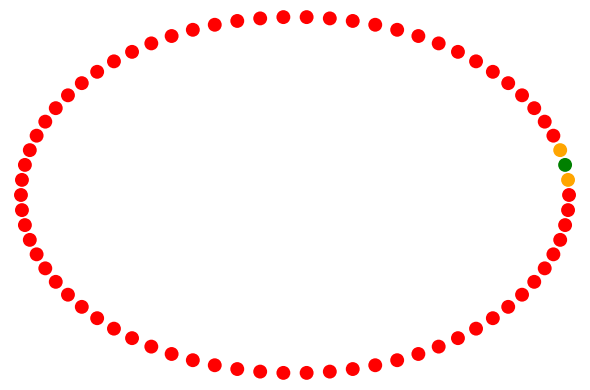

In [6]:
paint(100)

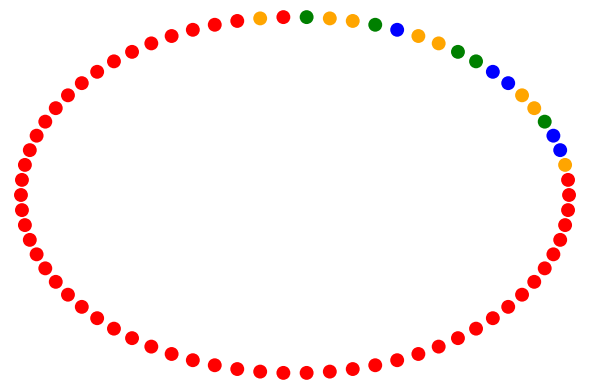

In [7]:
paint(1261473586128)

### 3. Решим задачу в общем виде.

Сколькими способами можно составить бусы из n бусинок k различных цветов (с точностью до поворотов и осевых симметрий)?

$e$ - нейтральное преобразование в виде перестановки имеет n независимых циклов.

$e = (1)(2)...(n)$

$ $

$\sigma$ - поворот против часовой стрелки на одну бусинку имеет 1 независимый цикл.

$\sigma = (1, 2, ..., n)$

$\sigma$ -цикл длины $a$, $gcd(a,i) = b$ $=>$ $\sigma^i$ - произведение b циклов, у которых длина $\frac{a}{b}$. То есть количество независимых циклов для $\sigma^i$ равно $gcd(n, i)$, где $i = 2, 3, ..., n-1$.

$ $

$\tau$ - первая осевая симметрия имеет $\frac{n}{2}$ независимых циклов для четного n и $[\frac{n}{2}] + 1$ независимых циклов для нечетного n.

$\tau = (1, n)(2, n-1)...(\frac{n}{2}, \frac{n}{2}+1)$ для четного n.

$\tau = (1, n)(2, n-1)...([\frac{n}{2}], [\frac{n}{2}]+2)([\frac{n}{2}] + 1)$ для нечетного n.

Для четных $n$ в перестановках $\tau\sigma, \tau\sigma^2, ..., \tau\sigma^{n-1}$ поворот на несколько бусин, затем поворот относительно оси. В результате либо все отразились, либо две бусинки остались на месте. Результаты чередуются через раз. Количество независимых циклов для $\tau\sigma^i$ равно $\frac{n}{2} + mod(i, 2)$, где $i = 1, 2, ..., n-1$

Для нечетных $n$ в перестановках $\tau\sigma, \tau\sigma^2, ..., \tau\sigma^{n-1}$ поворот на несколько бусин, затем поворот относительно оси. В результате все отразились кроме одной бусинки, которая осталась на месте. Ось симметрии проходит через бусинку, у которой номер $[\frac{n}{2}] + 1$. Количество независимых циклов для $\tau\sigma^i$ равно $[\frac{n}{2}] + 1$, где $i = 1, 2, ..., n-1$

$ $

По лемме Бёрнсайда:

для четных n:

$N = \cfrac{1}{\#G}\sum_{g \in G} \#X^{g} = \frac{1}{2n}\Bigg(k^n + k + \sum_{i = 2}^{n-1} k^{gcd(n, i)} + k^{\frac{n}{2}} + \sum_{i = 1}^{n - 1} k^{\frac{n}{2} + mod(i, 2)}\Bigg)$

для нечетных n:

$N = \cfrac{1}{\#G}\sum_{g \in G} \#X^{g} = \frac{1}{2n}\Bigg(k^n + k + \sum_{i = 2}^{n-1} k^{gcd(n, i)} + \sum_{i = 1}^{n} k^{[\frac{n}{2}] + 1}\Bigg)$

In [8]:
n = 74
k = 4
N = 1/(2*n) * (k**n + k + sum([k ** gcd(n, i) for i in range(2, n)]) + k ** (n/2) + sum([(k ** (n/2 + i%2)) for i in range(1, n)]))
pretty_print(f"N = {N}")
pretty_print("N = 2410891372814121420730303601524518919828900 для проверки")
pretty_print("Значения совпадают!")

'N = 2410891372814121420730303601524518919828900'

'N = 2410891372814121420730303601524518919828900 для проверки'

'Значения совпадают!'

## Выводы
Таким образом, в практической работе была изучена и использована лемма Бёрнсайда для решения задачи о раскрасках: определение количества способов составления бус с точностью до поворотов и осевых симметрий. С использованием систем компьютерной алгебры были получены перестановки и графически изображены раскраски бус. Также была решена задача определения количества способов составления бус из n бусинок k различных цветов (с точностью до поворотов и осевых симметрий) в общем виде.